In [ ]:
import numpy as np
import pandas as pd

In [ ]:
import seaborn as sns #visualisation
import matplotlib.pyplot as plt #visualisation
%matplotlib inline
sns.set(color_codes=True)
from scipy import stats
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv('car_data.csv')

In [ ]:
df.head(5)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [ ]:
print(df.describe())

               Year    Engine HP  Engine Cylinders  Number of Doors  \
count  11914.000000  11845.00000      11884.000000     11908.000000   
mean    2010.384338    249.38607          5.628829         3.436093   
std        7.579740    109.19187          1.780559         0.881315   
min     1990.000000     55.00000          0.000000         2.000000   
25%     2007.000000    170.00000          4.000000         2.000000   
50%     2015.000000    227.00000          6.000000         4.000000   
75%     2016.000000    300.00000          6.000000         4.000000   
max     2017.000000   1001.00000         16.000000         4.000000   

        highway MPG      city mpg    Popularity          MSRP  
count  11914.000000  11914.000000  11914.000000  1.191400e+04  
mean      26.637485     19.733255   1554.911197  4.059474e+04  
std        8.863001      8.987798   1441.855347  6.010910e+04  
min       12.000000      7.000000      2.000000  2.000000e+03  
25%       22.000000     16.000000    549

In [ ]:
df.drop(["Engine Fuel Type", "Market Category", "Vehicle Style", "Number of Doors", "Vehicle Size"], axis = 1, inplace = True)

In [ ]:
df.head()

,Make,Model,Year,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,26,19,3916,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,19,3916,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,20,3916,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,3916,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,3916,34500


In [ ]:
df.columns = ['make', 'model', 'year', 'hp', 'cylinders', 'transmission', 'drive_mode', 'mpg_h', 'mpg_c','populariy', 'price']

In [ ]:
df.head()

,make,model,year,hp,cylinders,transmission,drive_mode,mpg_h,mpg_c,populariy,price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,26,19,3916,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,19,3916,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,20,3916,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,3916,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,3916,34500


In [ ]:
df[df.duplicated()]

,make,model,year,hp,cylinders,transmission,drive_mode,mpg_h,mpg_c,populariy,price
14,BMW,1 Series,2013,230.0,6.0,MANUAL,rear wheel drive,28,19,3916,31500
18,Audi,100,1992,172.0,6.0,MANUAL,front wheel drive,24,17,3105,2000
20,Audi,100,1992,172.0,6.0,MANUAL,front wheel drive,24,17,3105,2000
24,Audi,100,1993,172.0,6.0,MANUAL,front wheel drive,24,17,3105,2000
25,Audi,100,1993,172.0,6.0,MANUAL,front wheel drive,24,17,3105,2000
...,...,...,...,...,...,...,...,...,...,...,...
11481,Suzuki,X-90,1998,95.0,4.0,MANUAL,four wheel drive,26,22,481,2000
11603,Volvo,XC60,2017,302.0,4.0,AUTOMATIC,all wheel drive,29,20,870,46350
11604,Volvo,XC60,2017,240.0,4.0,AUTOMATIC,front wheel drive,30,23,870,40950
11708,Suzuki,XL7,2008,252.0,6.0,AUTOMATIC,all wheel drive,22,15,481,29149


In [ ]:
df.drop_duplicates(keep = 'first', inplace = True)

In [ ]:
df[df.duplicated()]

,make,model,year,hp,cylinders,transmission,drive_mode,mpg_h,mpg_c,populariy,price


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10925 entries, 0 to 11913
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   make          10925 non-null  object 
 1   model         10925 non-null  object 
 2   year          10925 non-null  int64  
 3   hp            10856 non-null  float64
 4   cylinders     10895 non-null  float64
 5   transmission  10925 non-null  object 
 6   drive_mode    10925 non-null  object 
 7   mpg_h         10925 non-null  int64  
 8   mpg_c         10925 non-null  int64  
 9   populariy     10925 non-null  int64  
 10  price         10925 non-null  int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 1.0+ MB


In [ ]:
df.isnull().sum()

make             0
model            0
year             0
hp              69
cylinders       30
transmission     0
drive_mode       0
mpg_h            0
mpg_c            0
populariy        0
price            0
dtype: int64

In [ ]:
df = df.dropna()

In [ ]:
print(df.isnull().sum())

make            0
model           0
year            0
hp              0
cylinders       0
transmission    0
drive_mode      0
mpg_h           0
mpg_c           0
populariy       0
price           0
dtype: int64


In [ ]:
df.describe()

,year,hp,cylinders,mpg_h,mpg_c,populariy,price
count,10827.000000,10827.000000,10827.000000,10827.000000,10827.000000,10827.000000,1.082700e+04
mean,2010.896370,254.553062,5.691604,26.308119,19.327607,1562.244851,4.249325e+04
std,7.029534,109.841537,1.768551,7.504652,6.643567,1448.060299,6.229451e+04
min,1990.000000,55.000000,0.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,173.000000,4.000000,22.000000,16.000000,549.000000,2.197250e+04
50%,2015.000000,240.000000,6.000000,25.000000,18.000000,1385.000000,3.084500e+04
75%,2016.000000,303.000000,6.000000,30.000000,22.000000,2009.000000,4.330000e+04
max,2017.000000,1001.000000,16.000000,354.000000,137.000000,5657.000000,2.065902e+06


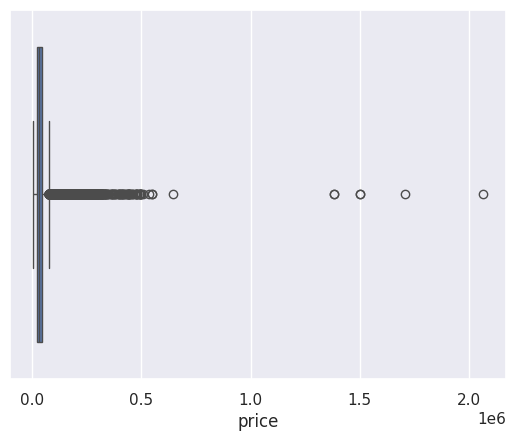

In [ ]:
## Plot a boxplot for 'Price' column in dataset.
sns.boxplot(x = df['price'])
plt.show()

Observation
Here as you see that we got some values near to 1.5 and 2.0 . So these values are called outliers. Because there are away from the normal values. Now we have detect the outliers of the feature of Price.

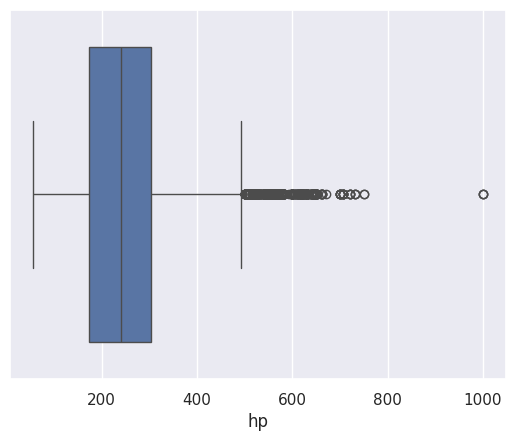

In [ ]:
## Plot a boxplot for 'Hp' column in dataset.
sns.boxplot(x = df['hp'])
plt.show()

Here boxplots show the proper distribution of of 25 percentile and 75 percentile of the feature of HP.

In [ ]:
# print all the columns which are of int or float datatype in df.

df1 = df.loc[:, df.dtypes != object]
df1

,year,hp,cylinders,mpg_h,mpg_c,populariy,price
0,2011,335.0,6.0,26,19,3916,46135
1,2011,300.0,6.0,28,19,3916,40650
2,2011,300.0,6.0,28,20,3916,36350
3,2011,230.0,6.0,28,18,3916,29450
4,2011,230.0,6.0,28,18,3916,34500
...,...,...,...,...,...,...,...
11909,2012,300.0,6.0,23,16,204,46120
11910,2012,300.0,6.0,23,16,204,56670
11911,2012,300.0,6.0,23,16,204,50620
11912,2013,300.0,6.0,23,16,204,50920


In [ ]:
# save column names of the above output in variable list
l = list(df.loc[:, df.dtypes != object].columns)
l

['year', 'hp', 'cylinders', 'mpg_h', 'mpg_c', 'populariy', 'price']

In [ ]:
## define Q1 and Q2
Q1 = np.quantile(df['hp'], 0.25)
Q3 = np.quantile(df['hp'], 0.75)

# define IQR (interquantile range)
IQR = Q3-Q1

# define df2 after removing outliers
#df2 = df[~((df < (Q1 - (1.5 * IQR))) | (df > (Q3 + (1.5 * IQR)))).any(axis=1)]

Outlier removal using Z-score function

We will use Z-score function defined in scipy library to detect the outliers in dataframe df having columns which are in variable 'l'

In [ ]:
z = np.abs(stats.zscore(df[l]))
z

,year,hp,cylinders,mpg_h,mpg_c,populariy,price
0,0.014743,0.732425,0.174386,0.041059,0.049314,1.625529,0.058463
1,0.014743,0.413769,0.174386,0.225455,0.049314,1.625529,0.029591
2,0.014743,0.413769,0.174386,0.225455,0.101214,1.625529,0.098621
3,0.014743,0.223542,0.174386,0.225455,0.199843,1.625529,0.209390
4,0.014743,0.223542,0.174386,0.225455,0.199843,1.625529,0.128320
...,...,...,...,...,...,...,...
11909,0.157006,0.413769,0.174386,0.440829,0.500900,0.938019,0.058222
11910,0.157006,0.413769,0.174386,0.440829,0.500900,0.938019,0.227587
11911,0.157006,0.413769,0.174386,0.440829,0.500900,0.938019,0.130463
11912,0.299270,0.413769,0.174386,0.440829,0.500900,0.938019,0.135279


In most of the cases a threshold of 3 or -3 is used i.e if the Z-score value is greater than or less than 3 or -3 respectively, that data point will be identified as outliers.

In [ ]:
threshold = 3
df3 = df[(z<threshold).all(axis = 1)]
df3

,make,model,year,hp,cylinders,transmission,drive_mode,mpg_h,mpg_c,populariy,price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,26,19,3916,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,19,3916,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,20,3916,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,3916,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,all wheel drive,23,16,204,46120
11910,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,all wheel drive,23,16,204,56670
11911,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,all wheel drive,23,16,204,50620
11912,Acura,ZDX,2013,300.0,6.0,AUTOMATIC,all wheel drive,23,16,204,50920


In [ ]:
# print the shape difference of df df2 and df3.
print(df.shape)
#print(df2.shape)
print(df3.shape)

(10827, 11)
(10338, 11)


### 1 . Histogram & Density Plots ###

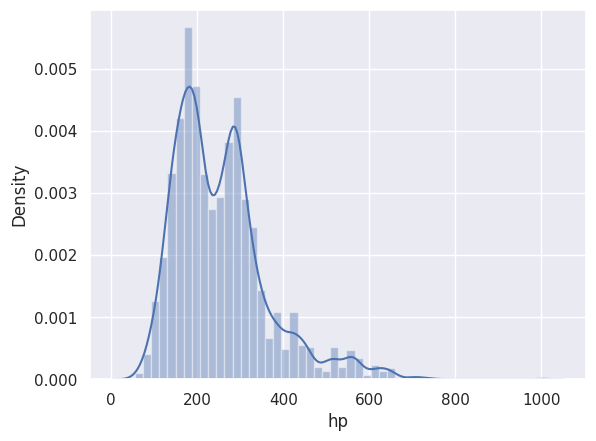

In [ ]:
#ploting distplot for variable HP
sns.distplot(df['hp'])
plt.show()

### 2. Bar plots ###

### 3.Count Plot

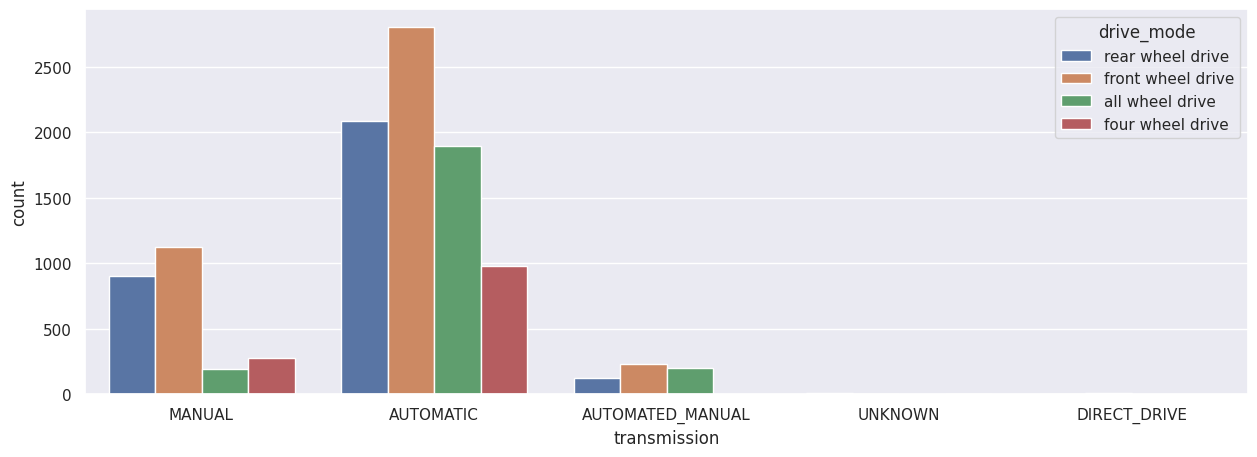

In [ ]:
plt.figure(figsize=(15,5))

sns.countplot(x = 'transmission', hue = 'drive_mode', data = df)
plt.show()
# 'Cylinders', y='Price'

# Visualising Bivariate Distributions #

1. Scatterplots

Using scatterplot, the correlation between 'HP' and 'Price' column of the data.

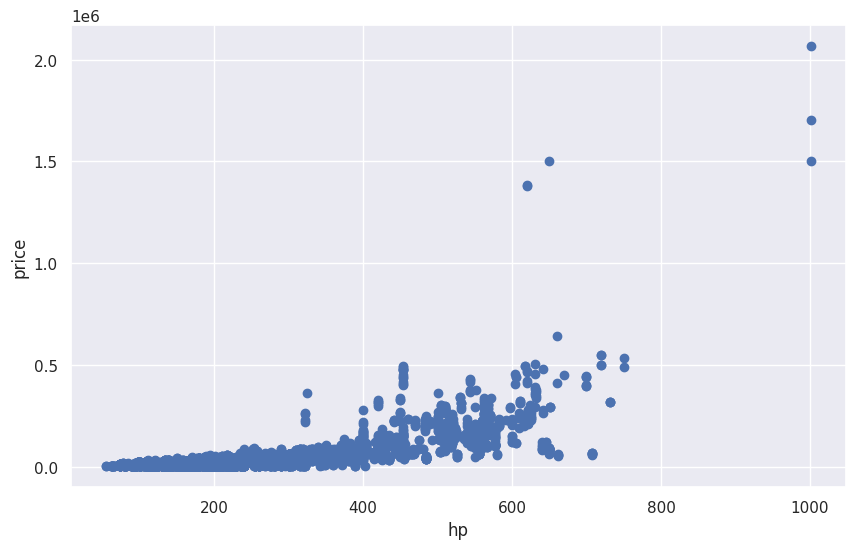

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(x=df['hp'], y=df['price'])
ax.set_xlabel('hp')
ax.set_ylabel('price')
plt.show()

# 4. joint distributions #

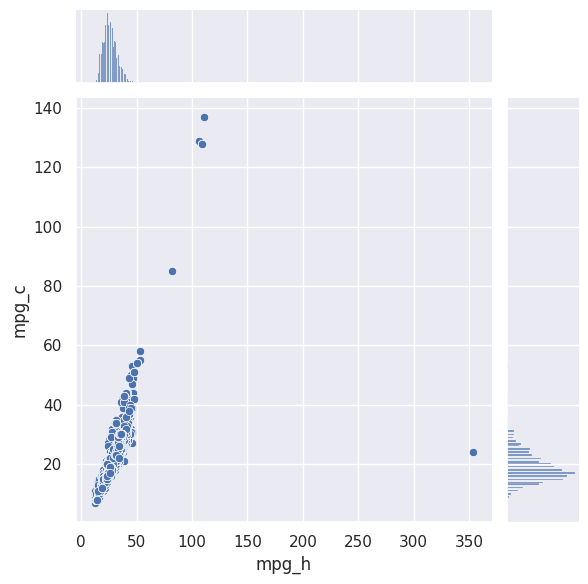

In [ ]:
# joint plots of MPG_H and MPG-C
sns.jointplot(x = df['mpg_h'],y = df['mpg_c'], data=df)
plt.show()

# 5. Plotting Aggregated Values across Categories #

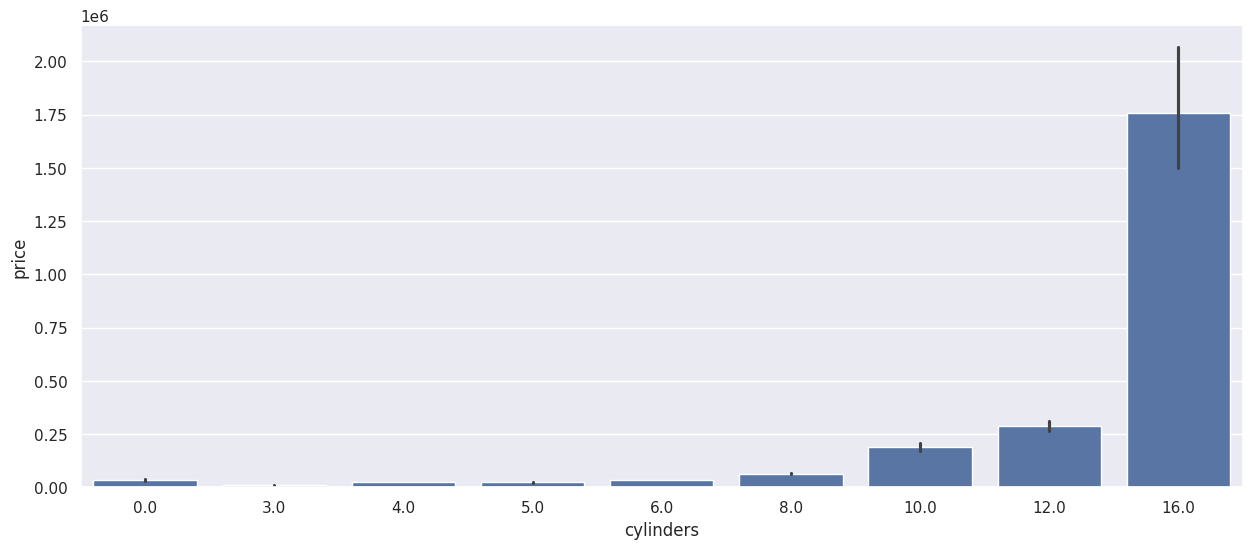

In [ ]:
# bar plot with default statistic=mean between Cylinder and Price
plt.figure(figsize = (15,6))
sns.barplot(x = 'cylinders', y = 'price', data = df)
plt.show()

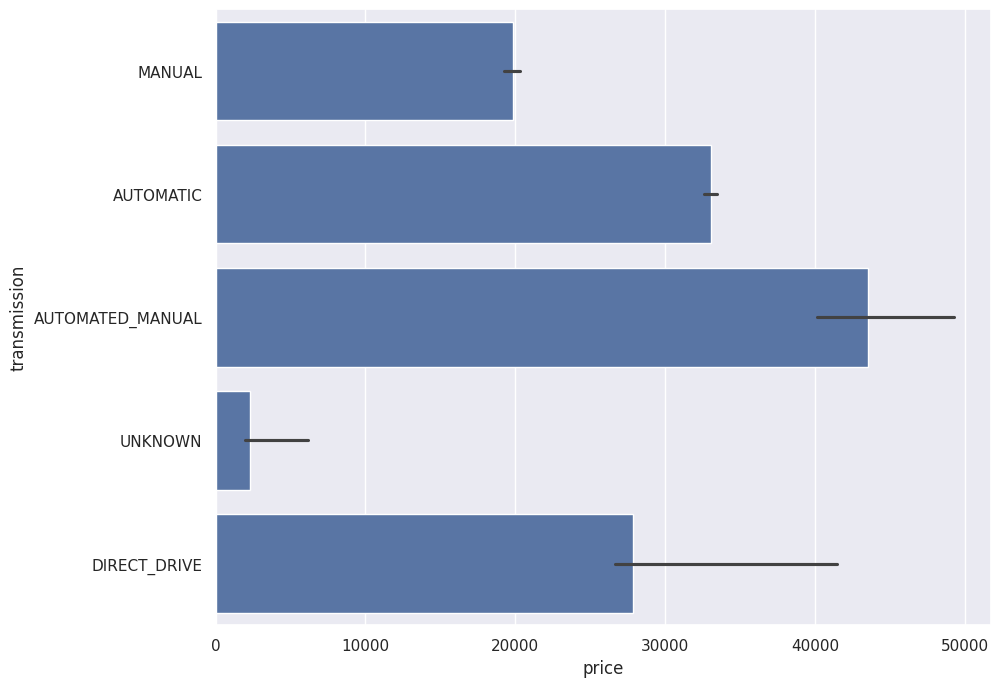

In [ ]:
# Plotting categorical variable Transmission across the y-axis
plt.figure(figsize = (10,8))
sns.barplot(x = 'price', y = 'transmission', data = df, estimator = np.median)
plt.show()

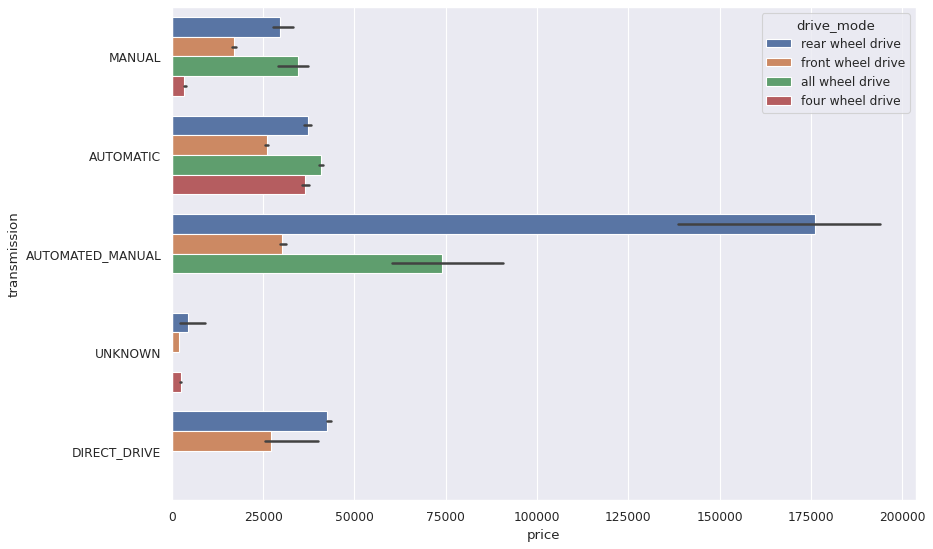

In [ ]:
# bar plot for Price and Transmission with hue="Drive Mode"
plt.figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')
sns.barplot(x = 'price', y = 'transmission',hue = 'drive_mode', data = df, estimator = np.median)
plt.show()

# Multivariate Plots #

# 1. Pairplot #

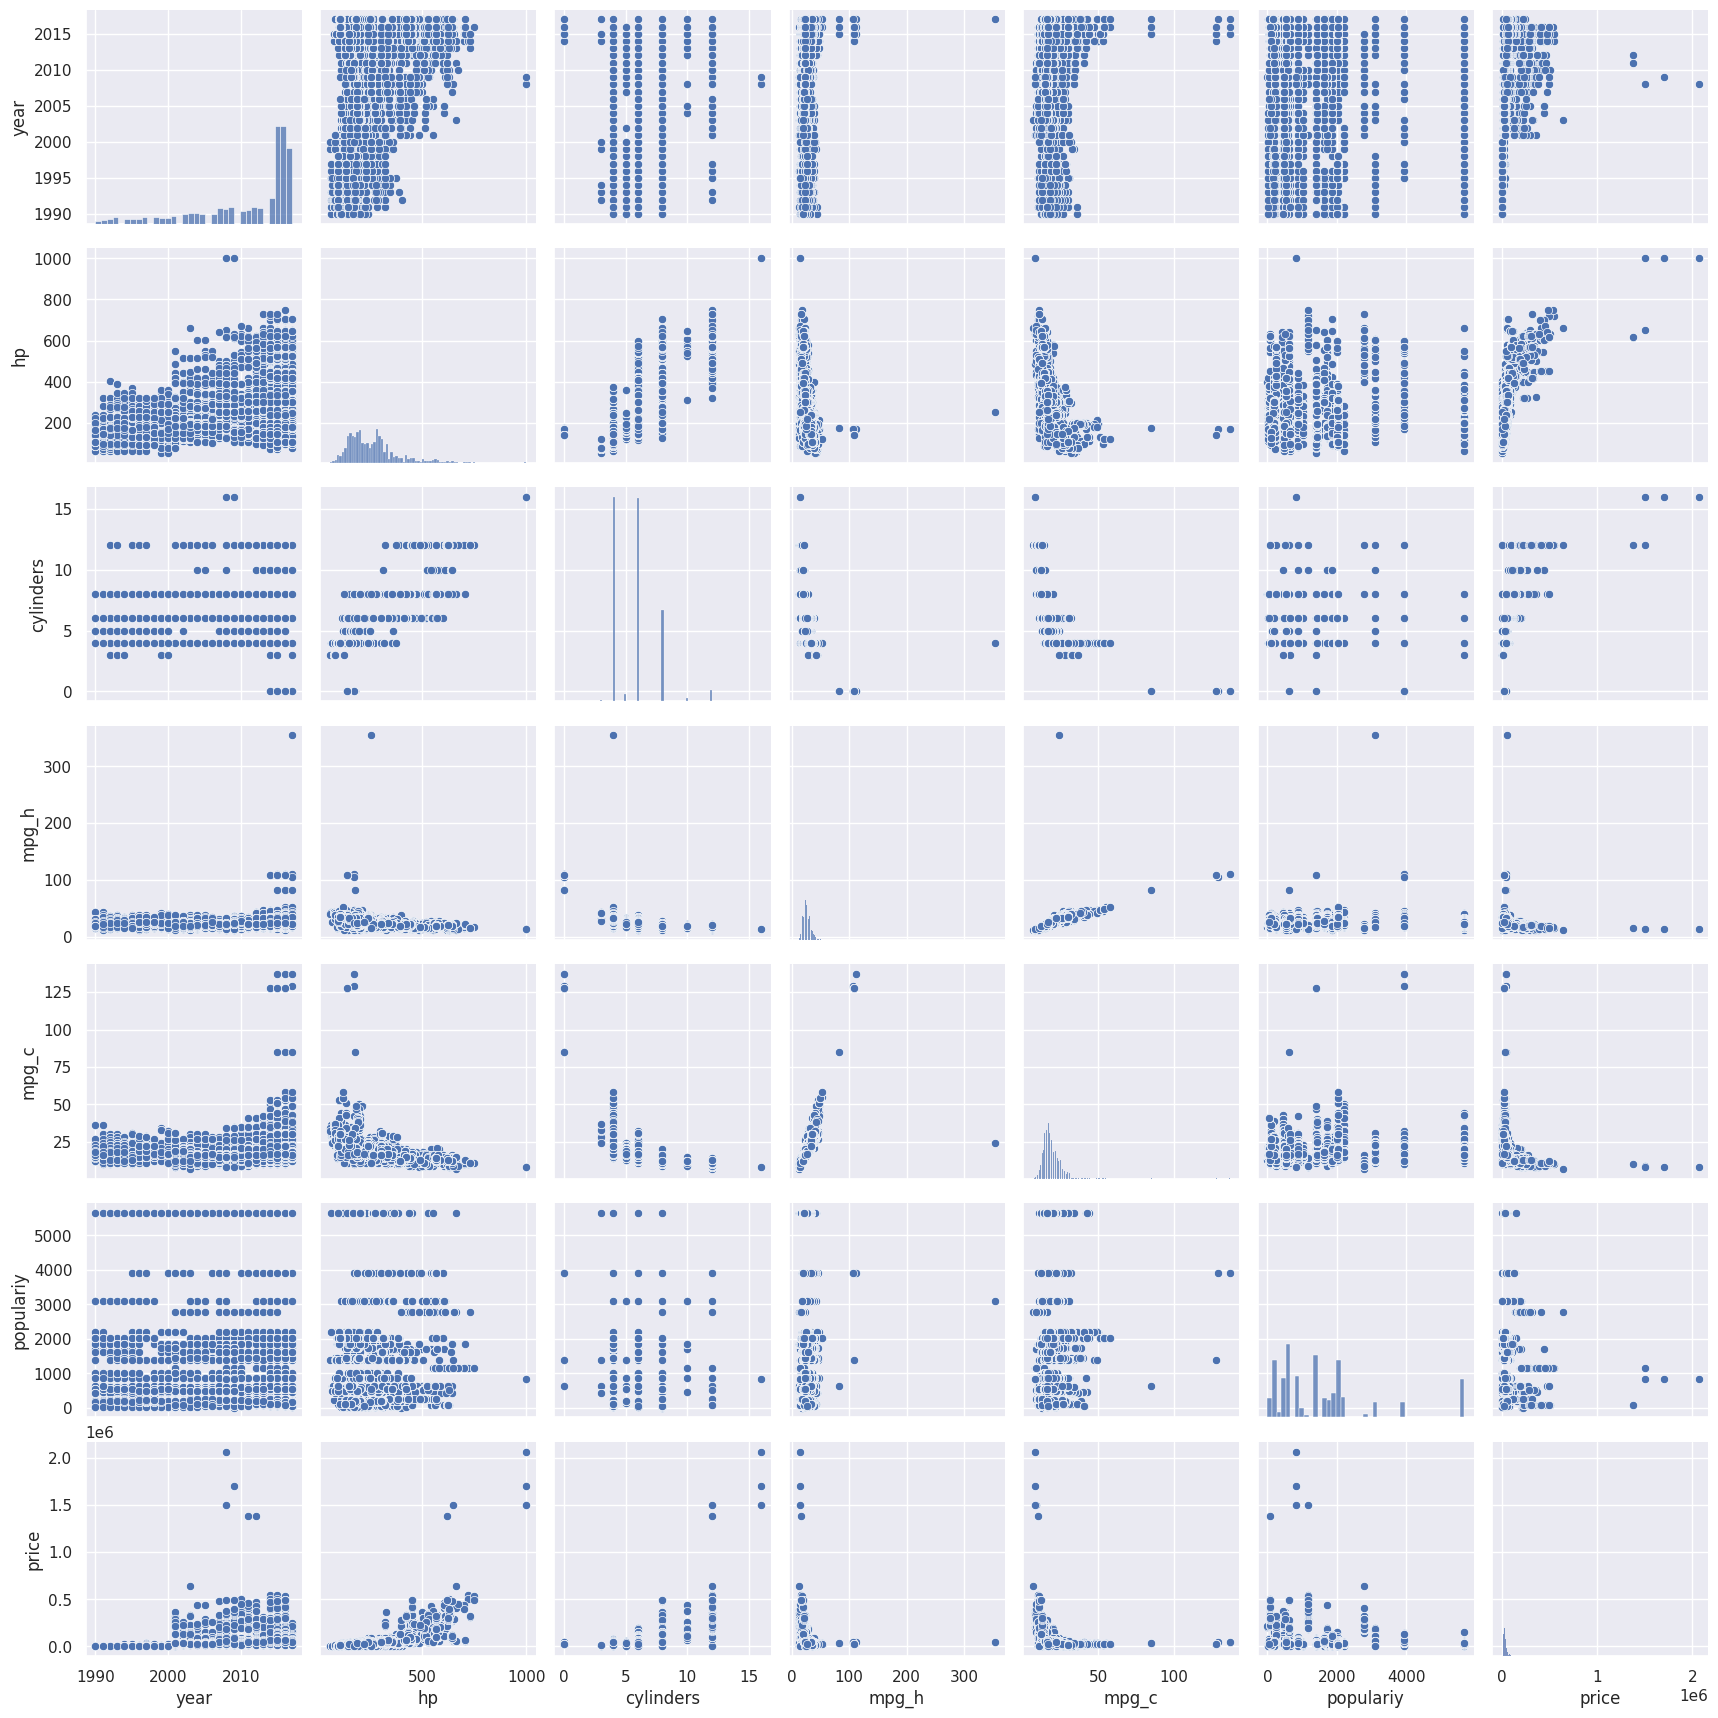

In [ ]:
# plot pairplot on df

sns.pairplot(df)
plt.show()

# 2. Heatmaps #

In [ ]:
#the correlation of features of the data
corr = df1.corr()
corr

,year,hp,cylinders,mpg_h,mpg_c,populariy,price
year,1.000000,0.314971,-0.050598,0.284237,0.234135,0.081844,0.196789
hp,0.314971,1.000000,0.788007,-0.420281,-0.473551,0.038836,0.659835
cylinders,-0.050598,0.788007,1.000000,-0.611576,-0.632407,0.038284,0.554740
mpg_h,0.284237,-0.420281,-0.611576,1.000000,0.841229,-0.023518,-0.209150
mpg_c,0.234135,-0.473551,-0.632407,0.841229,1.000000,-0.006563,-0.234050
populariy,0.081844,0.038836,0.038284,-0.023518,-0.006563,1.000000,-0.050232
price,0.196789,0.659835,0.554740,-0.209150,-0.234050,-0.050232,1.000000


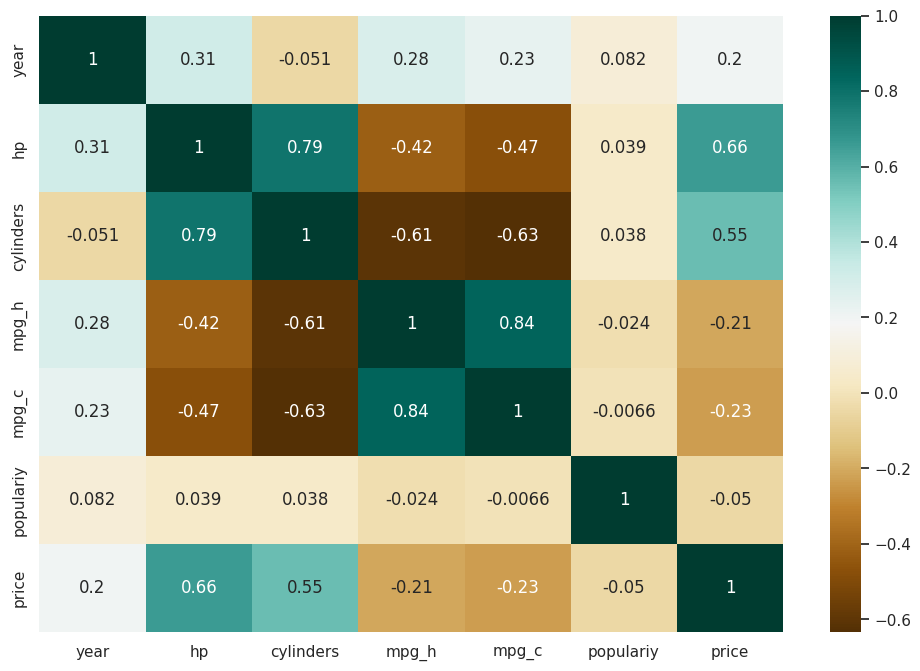

In [ ]:
# set cmap = 'BrBG', annot = True - to get the same graph as shown below
# set size of graph = (12,8)
plt.figure(figsize = (12,8))
sns.heatmap(corr, cmap = 'BrBG', annot = True)
plt.show()